# Clustering K-means

# Libreias que vamos a usar

In [289]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from statistics import variance
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# Seed Dataset

## Descripcion del dataset

El grupo examinado comprende de granos pertenecientes a tres variedades diferentes de trigo: Kama, Rosa y Canadiense, 70 elementos cada una,seleccionados al azar para el experimento.

Se detectó una visualización de alta calidad de la estructura interna del grano mediante una técnica de rayos X blandos.
Esta técnica no es destructiva y es considerablemente más barata que otras técnicas de imagen más sofisticadas, como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron en placas KODAK de rayos X de 13x18 cm. Los estudios se realizaron con granos de trigo cosechados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Para construir los datos, se midieron siete parámetros geométricos de los granos de trigo

1. Area
2. Perímetro
3. Compacidad C = 4*pi*A/P^2
4. Longitud del grano
5. Anchura del grano
6. Coeficiente de asimetría
7. Longitud del surco del núcleo

Charytanowicz, M., Niewczas, J., Kulczycki, P., Kowalski, P. A., Łukasik, S., & Żak, S. (2012). seeds Dataset. Obtenido de [Link](https://archive.ics.uci.edu/ml/datasets/seeds#)

# Cargamos el csv correspondiente

In [290]:
data = pd.read_csv("seeds_dataset.csv")
data 

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


El dataset incluia los datos de referecnia del tipo de semillas, pero estos fueron eliminados antes de cargar los datos, debido a que el metodo cluster k-mean no hace uso de estos datos, ya que es un metodo unsupervisado de entrenamiento.


# Analisis de datos

Cargamos los datos para el entrenamiento no regulado de los k-means

In [291]:
x = data
x

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Podemos observar que los datos tienen diferente valores de escala y dimension, para ello utilizamos _StandardScaler_, el  cual nos permite estandarizar las características eliminando la media y escalando a la varianza unitaria.

Por medio de la formula:
$$ z = \frac{(x - u)}{  s} $$

donde u reresenta a la media y s representa a la varianza estandar

In [292]:
scaler  = StandardScaler()
x_train = scaler.fit_transform(x)
x_train

array([[ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

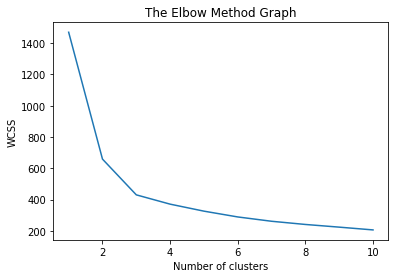

In [293]:
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

    kmeans.fit(x_train)
#kmeans algorithm fits to the X dataset
    wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
#4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [294]:
clusters  = KMeans( n_clusters=3, random_state= 42 ,max_iter = 1000).fit(x_train)
labels = clusters.predict(x_train)
center_points = clusters.cluster_centers_
labels, center_points

(array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
        2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([[ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
         -0.04521936,  1.29230787],
        [-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
          0.69480448, -0.62480856],
        [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.0016

In [295]:
data['types k-means'] = labels
data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,types k-means
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,1


In [296]:
predictions = pd.DataFrame(data = labels
             , columns = ['types k-means'])
predictions

,types k-means
0,2
1,2
2,2
3,2
4,2
...,...
205,1
206,1
207,1
208,1


In [297]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, predictions[['types k-means']]], axis = 1)
finalDf

,principal component 1,principal component 2,types k-means
0,-0.003386,1.913214,2
1,0.317047,0.783669,2
2,-0.459443,1.907225,2
3,-0.591936,1.931069,2
4,1.102910,2.068090,2
...,...,...,...
205,-1.991107,0.865956,1
206,-2.726865,-0.208190,1
207,-1.403633,-1.298593,1
208,-2.339328,0.099699,1


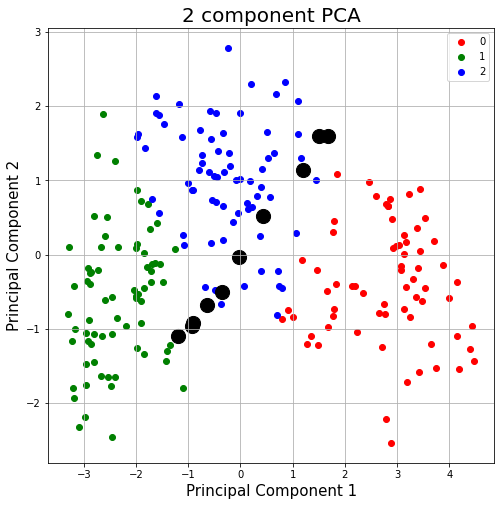

In [298]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']
class_labels = [0,1,2]
for target, color in zip(class_labels,colors):
    indicesToKeep = finalDf['types k-means'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')
ax.legend(class_labels)
ax.grid()

In [301]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([ 1.51411166, -0.90527587,  0.43398265, -1.19566693, -0.35078234,
        -0.02140691,  1.68388884, -0.63843927,  1.20085903, -0.93756312]),
 array([ 1.59947748, -0.92626918,  0.51934272, -1.0981457 , -0.51096944,
        -0.03113782,  1.59705363, -0.67928234,  1.14579781, -0.96656559]))

In [311]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
data = x

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =3 ,random_state=0,max_iter=1000)
kmeans.fit(data)
centroids= kmeans.cluster_centers_

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')
ax.legend(class_labels)
ax.grid()


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'